In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
import pandas as pd
import warnings
#from sklearn.exceptions import UndefinedMetricWarning
#warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC #, SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
#import itertools
#import math
from matplotlib import style
style.use('seaborn-dark')
sns.set_color_codes()

import tl_learning as tl
import sys
sys.path.append('../')
import support_utils as sup
import tl_utils as tlut
import data_explore_utils as dex
import display_utils as dut

**Recommended NBExtensions:**
- Collapsible Headings
- Table_beautifier

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',100)

### Import Candsets

In [3]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})'
sep = ','
# ***********************************************

candsets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [4]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})_train'
sep = ','
# ***********************************************

candsets_train = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [5]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})_test'
sep = ','
# ***********************************************

candsets_test = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [6]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_(.{2,4}_.{2,4})'
sep = ','
# ***********************************************

candsets_org_attr = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [7]:
candsets.keys()

dict_keys(['ban_bx', 'bx_wor', 'ban_half', 'wor_half', 'bx_half', 'ban_wor'])

In [8]:
candsets['ban_bx'].columns

Index(['ids', 'label', 'title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pages_num_abs_diff_sim', 'pubdate_days_diff_sim',
       'pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'binding_exact_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim'],
      dtype='object')

### Feature Set and Setup

In [9]:
all_feature = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pages_num_abs_diff_sim', 'pubdate_days_diff_sim',
       'pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'binding_exact_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

In [10]:
len(all_feature) == len(candsets['ban_bx'].columns.drop(['ids','label']))

True

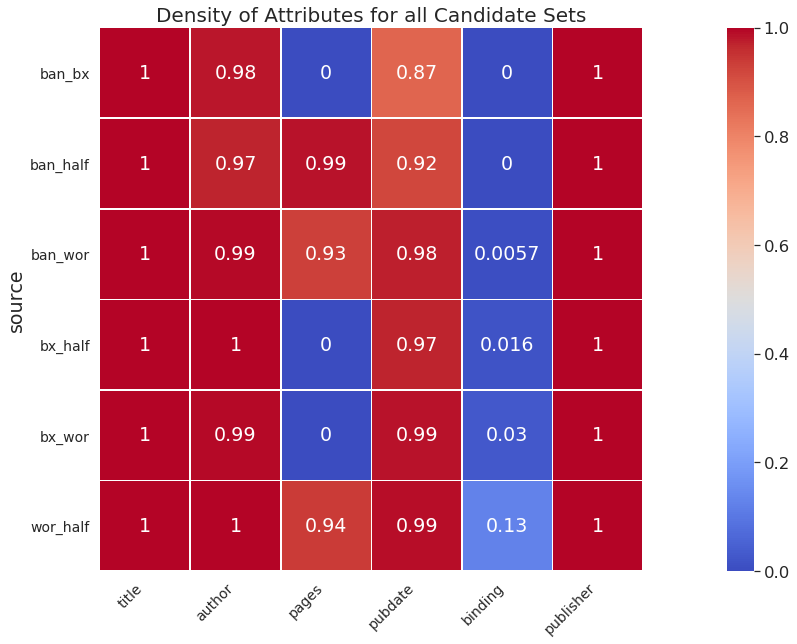

In [11]:
dex.plotDensityAttributesHeatmap(candsets)

In [12]:
# dense features for all combinations

# features excluded where the attribute has a very low density (<3%) for at 
# least one dataset that is involved either as source or target
rc_ban_bx_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_ban_bx_half = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_ban_half_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pages_num_abs_diff_sim', 'pubdate_days_diff_sim',
       'pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_bx_half_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

# assign the different feature sets (different dense features depending on combination)
dense_features_dict = {'ban_bx_wor':rc_ban_bx_wor,'ban_bx_half':rc_ban_bx_half,
                       'ban_half_wor':rc_ban_half_wor,'bx_half_wor':rc_bx_half_wor,
                       'ban_bx':rc_ban_bx_wor,'ban_half':rc_ban_half_wor,'ban_wor':rc_ban_half_wor,
                       'bx_half':rc_bx_half_wor,'bx_wor':rc_bx_half_wor,'wor_half':rc_ban_half_wor}

In [13]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../results/benchmarks/'
supervised_results = 'books_candsets_super_results'
unsupervised_results = 'books_candsets_unsuper_results'

# we use the same random_state for all experiments
random_state = 42
# assign which sklearn estimators to use for the TL Experiment
estimators_tl = {'logreg':LogisticRegression(random_state=random_state,solver='liblinear',max_iter=1000),
                 'dectree':DecisionTreeClassifier(random_state=random_state),
                 'randforest':RandomForestClassifier(random_state=random_state),
                 'xgb':xgb.XGBClassifier(random_state=random_state,objective="binary:logistic"),
                 'svm':LinearSVC(random_state=random_state,dual=False),
                 #'svm':SVC(random_state=random_state,kernel='linear'),
                 'logregcv':LogisticRegressionCV(random_state=random_state,cv=5,solver='liblinear',max_iter=1000)}

#### Import Supervised Results

In [14]:
candsets_super_results = sup.importJSONFileInDict(path_to_directory+supervised_results)

#### Import Unsupervised Results

In [15]:
candsets_unsuper_results = sup.importJSONFileInDict(path_to_directory+unsupervised_results)

#### Run TL Experiment (quite time-consuming, skip to import if no re-run desired)

In [55]:
da_weighting = None
#dense_features_dict = None
n = 10
tl_results = tl.performTLFromDict(candsets,candsets_train,candsets_test,estimators_tl,all_feature,
                                  dense_features_dict,da_weighting,n)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [99]:
sup.saveResultsToJSON(tl_results,'../../results/tl/books/books_tl_results')

Saved in ../../results/tl/books/books_tl_results.json


#### Import TL Results

In [24]:
tl_results = sup.importJSONFileInDict('../../results/tl/books/books_tl_results.json')

### TL Results

#### No Domain Adaptation

##### Whole Table

In [177]:
df_tl_results = dut.createDFwithTLResults(tl_results,candsets_super_results,candsets_unsuper_results,
                           estimators_tl.keys(),['all','dense'],'no_weighting','../../results/tl/books/books_tl_results')

TL Results when doing naive Transfer (no_weighting) on all feature and only dense features


##### Table with only all_feature results

In [182]:
feature = ['all']
selected_estimator = None
df_tl_results_all = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,
                                                     filename=f'../../results/tl/books/books_tl_results_{feature[0]}_feature')

##### Table with only dense_feature results

In [183]:
feature = ['dense']
selected_estimator = None
df_tl_results_all = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,
                                                     filename=f'../../results/tl/books/books_tl_results_{feature[0]}_feature')

In [191]:
feature = ['dense','all']
selected_estimator = ['randforest']
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,
                                        filename=f'../../results/tl/books/books_tl_results_all_dense_rf')

In [189]:
feature = ['dense','all']
selected_estimator = ['randforest']
selected_rows = [('ban_half','ban_bx'),('ban_wor','ban_bx'),('wor_half','bx_wor'),('ban_wor','bx_wor'),
                 ('ban_half','bx_half'),('wor_half','bx_half')]
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,selected_rows,
                                        filename=f'../../results/tl/books/books_tl_results_all_dense_rf_subset')

In [195]:
feature = ['dense','all']
selected_estimator = ['randforest']
selected_rows = [('ban_half','ban_bx'),('ban_wor','ban_bx'),('wor_half','bx_wor'),('ban_wor','bx_wor'),
                 ('ban_half','bx_half'),('wor_half','bx_half'),
                (  'ban_bx', 'ban_half'),(  'bx_wor', 'wor_half'),(  'ban_bx',  'ban_wor'),
                ( 'bx_half', 'ban_half'),(  'bx_wor',  'ban_wor'),( 'bx_half', 'wor_half')]
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,selected_rows,
                                        filename=f'../../results/tl/books/books_tl_results_all_dense_rf_subset2')

In [221]:
feature = ['dense']
selected_estimator = ['randforest','xgb']
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,
                                        filename=f'../../results/tl/books/books_tl_results_dense_xgb_rf')

In [222]:
df[('dense', 'randforest', 'Δ TL_avg - Unsup')] = df.apply(lambda row: row[('dense','randforest','TL_avg')]-row[('','','unsuper_res')],axis=1)
df[('dense', 'xgb', 'Δ TL_avg - Unsup')] = df.apply(lambda row: row[('dense','xgb','TL_avg')]-row[('','','unsuper_res')],axis=1)

In [223]:
df.columns

MultiIndex([('dense', 'randforest',           'TL_avg'),
            ('dense', 'randforest',          'Tar_max'),
            ('dense', 'randforest',          'Tar_exc'),
            ('dense', 'randforest',          'Tar_sup'),
            ('dense',        'xgb',           'TL_avg'),
            ('dense',        'xgb',          'Tar_max'),
            ('dense',        'xgb',          'Tar_exc'),
            ('dense',        'xgb',          'Tar_sup'),
            (     '',           '',      'unsuper_res'),
            ('dense', 'randforest', 'Δ TL_avg - Unsup'),
            ('dense',        'xgb', 'Δ TL_avg - Unsup')],
           names=['Features', 'Estimators', 'Results'])

In [224]:
df = df[[('dense', 'randforest',           'TL_avg'),
         ('dense', 'randforest', 'Δ TL_avg - Unsup'),
            ('dense', 'randforest',          'Tar_exc'),
            ('dense', 'randforest',          'Tar_sup'),
            ('dense',        'xgb',           'TL_avg'),
            ('dense',        'xgb', 'Δ TL_avg - Unsup'),
            ('dense',        'xgb',          'Tar_exc'),
            ('dense',        'xgb',          'Tar_sup'),
            (     '',           '',      'unsuper_res')]]

In [225]:
df

Features               dense                                          \
Estimators        randforest                                     xgb   
Results               TL_avg Δ TL_avg - Unsup Tar_exc Tar_sup TL_avg   
Source   Target                                                        
ban_bx   bx_wor        0.673           -0.030    14.0   0.818  0.683   
bx_wor   ban_bx        0.758            0.102    10.0   0.814  0.759   
ban_bx   ban_half      0.951            0.190   100.0   0.969  0.924   
ban_half ban_bx        0.704            0.048    10.0   0.814  0.733   
ban_bx   bx_half       0.891            0.203   160.0   0.895  0.860   
bx_half  ban_bx        0.768            0.112    14.0   0.814  0.796   
ban_bx   ban_wor       0.802            0.123   140.0   0.830  0.781   
ban_wor  ban_bx        0.476           -0.180     NaN   0.814  0.521   
bx_wor   wor_half      0.694           -0.005     NaN   0.864  0.714   
wor_half bx_wor        0.533           -0.170     NaN   0.818  0.555   
bx_wor   bx_half       0.785            0.097    10.0   0.895  0.803   
bx_half  bx_wor        0.740            0.037    24.0   0.818  0.739   
bx_wor   ban_wor       0.737            0.058    20.0   0.830  0.751   
ban_wor  bx_wor        0.461           -0.242     NaN   0.818  0.510   
ban_half wor_half      0.852            0.153   300.0   0.864  0.847   
wor_half ban_half      0.896            0.135    10.0   0.969  0.908   
ban_half bx_half       0.801            0.113     NaN   0.895  0.806   
bx_half  ban_half      0.718           -0.043     NaN   0.969  0.870   
ban_half ban_wor       0.800            0.121    32.0   0.830  0.782   
ban_wor  ban_half      0.911            0.150    14.0   0.969  0.904   
wor_half bx_half       0.623           -0.065     NaN   0.895  0.604   
bx_half  wor_half      0.697           -0.002     NaN   0.864  0.796   
wor_half ban_wor       0.814            0.135    80.0   0.830  0.825   
ban_wor  wor_half      0.796            0.097    44.0   0.864  0.804   

Features                                                        
Estimators                                                      
Results           Δ TL_avg - Unsup Tar_exc Tar_sup unsuper_res  
Source   Target                                                 
ban_bx   bx_wor             -0.020    10.0   0.856       0.703  
bx_wor   ban_bx              0.103    24.0   0.872       0.656  
ban_bx   ban_half            0.163    14.0   0.960       0.761  
ban_half ban_bx              0.077    10.0   0.872       0.656  
ban_bx   bx_half             0.172    10.0   0.894       0.688  
bx_half  ban_bx              0.140    60.0   0.872       0.656  
ban_bx   ban_wor             0.102    70.0   0.846       0.679  
ban_wor  ban_bx             -0.135     NaN   0.872       0.656  
bx_wor   wor_half            0.015    10.0   0.896       0.699  
wor_half bx_wor             -0.148     NaN   0.856       0.703  
bx_wor   bx_half             0.115    10.0   0.894       0.688  
bx_half  bx_wor              0.036    44.0   0.856       0.703  
bx_wor   ban_wor             0.072    10.0   0.846       0.679  
ban_wor  bx_wor             -0.193     NaN   0.856       0.703  
ban_half wor_half            0.148   200.0   0.896       0.699  
wor_half ban_half            0.147    14.0   0.960       0.761  
ban_half bx_half             0.118    10.0   0.894       0.688  
bx_half  ban_half            0.109    10.0   0.960       0.761  
ban_half ban_wor             0.103    24.0   0.846       0.679  
ban_wor  ban_half            0.143    10.0   0.960       0.761  
wor_half bx_half            -0.084     NaN   0.894       0.688  
bx_half  wor_half            0.097   100.0   0.896       0.699  
wor_half ban_wor             0.146   300.0   0.846       0.679  
ban_wor  wor_half            0.105    70.0   0.896       0.699

In [227]:
filename = '../../results/tl/books/books_tl_results_dense_xgb_rf_subset_delta'
###########################################################################################
# style functions as nested functions
# function for pandas styler. Highlight all max values of TL_avg
def highlight_max(data):
    attr_max = 'background-color: #FBFF75'
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr_max if v else '' for v in is_max]
    else: 
        is_max = data.groupby('TL_avg').transform('max') == data
        return pd.DataFrame(np.where(is_max, attr_max, ''),
                            index=data.index, columns=data.columns)
# another function for pandas style. Highlight Tar_exc with green            
def highlight_tar_exc(row):
    # initiate list with the size of the row (length 32) with empty styling
    lst = ['' for x in row.index]
    # get the positions where TL_avg is bigger than Tar_max. pd.Series with length 8
    ser = row[:,:,'TL_avg']>row[:,:,'Tar_max']
    # counter if True at Pos 0 (i==0) in ser then lst at pos 2 (i+k) has to be changed
    # if i==1 then pos 6 (i+k). K has to be incremented by 3 for each execution of the loop
    k = 2
    for i, b in enumerate(ser):
        if(b):
            lst[i+k] = 'background-color: #A4FB95'
        k = k + 3
    return lst
# another function for pandas style. Highlight Tar_exc with green            
def highlight_tl_super_same(row):
    # initiate list with the size of the row (length 32) with empty styling
    lst = ['' for x in row.index]
    # get the positions where TL_avg is bigger than Tar_max. pd.Series with length 8
    ser = ((row[:,:,'TL_avg']>row[:,:,'Tar_sup']) | ((row[:,:,'Tar_sup']-row[:,:,'TL_avg'])<=0.01))
    # counter if True at Pos 0 (i==0) in ser then lst at pos 3 (i+k) has to be changed
    # if i==1 then pos 7 (i+k). K has to be incremented by 3 for each execution of the loop
    k = 3
    for i, b in enumerate(ser):
        if(b):
            lst[i+k] = 'background-color: #A4FB95'
        k = k + 3
    return lst
############################################################################################

styles=[
    {'selector': 'th','props': [
        ('border-style', 'solid'),
        ('border-color', '#D3D3D3'),
        ('vertical-align','top'),
        ('text-align','center')]}]
  
col_tar_exc = [col for col in df.columns if col[2]=='Tar_exc']
col_tar_exc_format = {}
for col in col_tar_exc:
    col_tar_exc_format.update({col:lambda x: '<b>{0:g}</b>'.format(x) if (not math.isnan(float(x))) else '-'})

col_tar_exc_format.update({('','','unsuper_res'):lambda x: '<font color=\'#00938B\'><b>{}</b></font>'.format(round(x,3))})
col_tar_exc_format.update({('dense', 'randforest', 'Δ TL_avg - Unsup'):lambda x: '<b>{}</b>'.format(round(x,3)) if x>0 else '<font color=\'#FF0000\'><b>{}</b></font>'.format(round(x,3))})
col_tar_exc_format.update({('dense', 'xgb', 'Δ TL_avg - Unsup'):lambda x: '<b>{}</b'.format(round(x,3)) if x>0 else '<font color=\'#FF0000\'><b>{}</b></font>'.format(round(x,3))})

col_tl_avg = [col for col in df.columns if col[2]=='TL_avg']
col_tl_avg_unsup = [col for col in df.columns if col[2]=='TL_avg' or col[2]=='unsuper_res']
html = (df.style.\
        apply(highlight_max,axis=1,subset=pd.IndexSlice[:,col_tl_avg]).\
        apply(lambda x: ['background: #FF7070' if float(v) < x.iloc[-1] else '' for v in x], axis=1,subset=pd.IndexSlice[:,col_tl_avg_unsup]).\
        #apply(highlight_tar_exc,axis=1).\
        apply(highlight_tl_super_same,axis=1)).set_table_styles(styles).set_precision(3).format(col_tar_exc_format)

display(html)
if(filename is not None):
    with open('{}.html'.format(filename), 'w') as f:
        f.write(html.render())

In [199]:
df[('', '', 'Δ TL_avg')] = df.apply(lambda row: row[('dense','randforest','TL_avg')]-row[('all','randforest','TL_avg')],axis=1)

In [200]:
df

Features                 all                              dense          \
Estimators        randforest                         randforest           
Results               TL_avg Tar_max Tar_exc Tar_sup     TL_avg Tar_max   
Source   Target                                                           
ban_half ban_bx        0.547   0.842     NaN   0.814      0.704   0.843   
ban_wor  ban_bx        0.134   0.844     NaN   0.814      0.476   0.841   
wor_half bx_wor        0.391   0.788     NaN   0.818      0.533   0.790   
ban_wor  bx_wor        0.105   0.788     NaN   0.818      0.461   0.792   
ban_half bx_half       0.590   0.896     NaN   0.895      0.801   0.892   
wor_half bx_half       0.391   0.891     NaN   0.895      0.623   0.893   
ban_bx   ban_half      0.939   0.962    38.0   0.969      0.951   0.960   
bx_wor   wor_half      0.701   0.860     NaN   0.864      0.694   0.838   
ban_bx   ban_wor       0.802   0.836    50.0   0.830      0.802   0.823   
bx_half  ban_half      0.715   0.960     NaN   0.969      0.718   0.960   
bx_wor   ban_wor       0.724   0.837    10.0   0.830      0.737   0.818   
bx_half  wor_half      0.698   0.865    10.0   0.864      0.697   0.837   

Features                                                
Estimators                                              
Results           Tar_exc Tar_sup unsuper_res Δ TL_avg  
Source   Target                                         
ban_half ban_bx      10.0   0.814       0.656    0.157  
ban_wor  ban_bx       NaN   0.814       0.656    0.342  
wor_half bx_wor       NaN   0.818       0.703    0.142  
ban_wor  bx_wor       NaN   0.818       0.703    0.356  
ban_half bx_half      NaN   0.895       0.688    0.211  
wor_half bx_half      NaN   0.895       0.688    0.232  
ban_bx   ban_half   100.0   0.969       0.761    0.012  
bx_wor   wor_half     NaN   0.864       0.699   -0.007  
ban_bx   ban_wor    140.0   0.830       0.679    0.000  
bx_half  ban_half     NaN   0.969       0.761    0.003  
bx_wor   ban_wor     20.0   0.830       0.679    0.013  
bx_half  wor_half     NaN   0.864       0.699   -0.001

In [204]:
filename = '../../results/tl/books/books_tl_results_all_dense_rf_subset_delta'
###########################################################################################
# style functions as nested functions
# function for pandas styler. Highlight all max values of TL_avg
def highlight_max(data):
    attr_max = 'background-color: #FBFF75'
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr_max if v else '' for v in is_max]
    else: 
        is_max = data.groupby('TL_avg').transform('max') == data
        return pd.DataFrame(np.where(is_max, attr_max, ''),
                            index=data.index, columns=data.columns)
# another function for pandas style. Highlight Tar_exc with green            
def highlight_tar_exc(row):
    # initiate list with the size of the row (length 32) with empty styling
    lst = ['' for x in row.index]
    # get the positions where TL_avg is bigger than Tar_max. pd.Series with length 8
    ser = row[:,:,'TL_avg']>row[:,:,'Tar_max']
    # counter if True at Pos 0 (i==0) in ser then lst at pos 2 (i+k) has to be changed
    # if i==1 then pos 6 (i+k). K has to be incremented by 3 for each execution of the loop
    k = 2
    for i, b in enumerate(ser):
        if(b):
            lst[i+k] = 'background-color: #A4FB95'
        k = k + 3
    return lst
# another function for pandas style. Highlight Tar_exc with green            
def highlight_tl_super_same(row):
    # initiate list with the size of the row (length 32) with empty styling
    lst = ['' for x in row.index]
    # get the positions where TL_avg is bigger than Tar_max. pd.Series with length 8
    ser = ((row[:,:,'TL_avg']>row[:,:,'Tar_sup']) | ((row[:,:,'Tar_sup']-row[:,:,'TL_avg'])<=0.01))
    # counter if True at Pos 0 (i==0) in ser then lst at pos 3 (i+k) has to be changed
    # if i==1 then pos 7 (i+k). K has to be incremented by 3 for each execution of the loop
    k = 3
    for i, b in enumerate(ser):
        if(b):
            lst[i+k] = 'background-color: #A4FB95'
        k = k + 3
    return lst
############################################################################################

styles=[
    {'selector': 'th','props': [
        ('border-style', 'solid'),
        ('border-color', '#D3D3D3'),
        ('vertical-align','top'),
        ('text-align','center')]}]
  
col_tar_exc = [col for col in df.columns if col[2]=='Tar_exc']
col_tar_exc_format = {}
for col in col_tar_exc:
    col_tar_exc_format.update({col:lambda x: '<b>{0:g}</b>'.format(x) if (not math.isnan(float(x))) else '-'})

col_tar_exc_format.update({('','','unsuper_res'):lambda x: '<font color=\'#00938B\'><b>{}</b></font>'.format(round(x,3))})
col_tar_exc_format.update({('', '', 'Δ TL_avg'):lambda x: '<p style="background: #ffffff"><b>{}</b></p>'.format(round(x,3))})

col_tl_avg = [col for col in df.columns if col[2]=='TL_avg']
html = (df.style.\
        apply(highlight_max,axis=1,subset=pd.IndexSlice[:,col_tl_avg]).\
        apply(lambda x: ['background: #FF7070' if float(v) < x.iloc[-2] else '' for v in x], axis=1).\
        apply(highlight_tar_exc,axis=1).\
        apply(highlight_tl_super_same,axis=1)).set_table_styles(styles).set_precision(3).format(col_tar_exc_format)

display(html)
if(filename is not None):
    with open('{}.html'.format(filename), 'w') as f:
        f.write(html.render())

In [175]:
feature = ['dense']
selected_estimator = ['logreg','randforest']
df = dut.returnDFwithTLResultsSelection(df_tl_results,feature,selected_estimator,filename='../../results/tl/books/books_tl_dense_lr_rf')

##### Table with only dense_feature results and Random Forest as selected estimator

In [136]:
feature = 'dense'
selected_estimator = 'randforest'
df_tl_results_rf_dense = tlut.returnDFwithTLResultsSubset(df_tl_results,candsets_unsuper_results,
                                                     feature,selected_estimator,
                                                     filename=f'../../results/tl/books/books_tl_results_{selected_estimator}_{feature}_feature')

Only displaying the results of randforest using dense feature


,,TL_avg,Tar_max,Tar_exc,Tar_sup,unsuper_res
Source,Target,,,,,
ban_bx,bx_wor,0.673,0.784,14,0.818,0.703
bx_wor,ban_bx,0.758,0.834,10,0.814,0.656
ban_bx,ban_half,0.951,0.960,100,0.969,0.761
ban_half,ban_bx,0.704,0.843,10,0.814,0.656
ban_bx,bx_half,0.891,0.894,160,0.895,0.688
bx_half,ban_bx,0.768,0.845,14,0.814,0.656
ban_bx,ban_wor,0.802,0.823,140,0.830,0.679
ban_wor,ban_bx,0.476,0.841,-,0.814,0.656
bx_wor,wor_half,0.694,0.838,-,0.864,0.699


___________________________________________________________________________________

In [130]:
feature = 'dense'
selected_estimtor = None
df_tl_results_nn_dense = tlut.returnDFwithTLResultsSubset(df_tl_results_nn,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/books/books_tl_results_nn_{feature}_feature')

##### Table with only dense_feature results and Random Forest as selected estimator

In [131]:
feature = 'dense'
selected_estimtor = 'randforest'
df_tl_results_rf_nn_dense = tlut.returnDFwithTLResultsSubset(df_tl_results_nn,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/books/books_tl_results_nn_{selected_estimator}_{feature}_feature')

Only displaying the results of randforest using dense feature


,,TL_avg,Tar_max,Tar_exc,Tar_sup,unsuper_res
Source,Target,,,,,
ban_bx,bx_wor,0.671,0.789,-,0.818,0.703
bx_wor,ban_bx,0.743,0.843,20,0.814,0.656
ban_bx,ban_half,0.942,0.958,50,0.969,0.761
ban_half,ban_bx,0.704,0.842,-,0.814,0.656
ban_bx,bx_half,0.891,0.893,60,0.895,0.688
bx_half,ban_bx,0.753,0.842,10,0.814,0.656
ban_bx,ban_wor,0.802,0.823,140,0.830,0.679
ban_wor,ban_bx,0.466,0.847,-,0.814,0.656
bx_wor,wor_half,0.705,0.842,10,0.864,0.699
